<a href="https://colab.research.google.com/github/pscabral/IFMA_Softex/blob/main/Classify%20131%20fruits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/Horea94/Fruit-Images-Dataset

Cloning into 'Fruit-Images-Dataset'...
remote: Enumerating objects: 385858, done.
remote: Counting objects: 100% (8693/8693), done.
remote: Compressing objects: 100% (8659/8659), done.
remote: Total 385858 (delta 37), reused 8688 (delta 34), pack-reused 377165
Receiving objects: 100% (385858/385858), 2.10 GiB | 24.54 MiB/s, done.
Resolving deltas: 100% (1197/1197), done.
Updating files: 100% (90503/90503), done.


In [4]:
import numpy as np
import pandas as pd
from pathlib import Path
import os.path
import matplotlib.pyplot as plt
import tensorflow as tf

In [5]:
# Create a list with the filepaths for training and testing
train_dir = Path('../content/Fruit-Images-Dataset/Training')
train_filepaths = list(train_dir.glob(r'**/*.jpg'))

test_dir = Path('../content/Fruit-Images-Dataset/Test')
test_filepaths = list(test_dir.glob(r'**/*.jpg'))

In [7]:
def proc_img(filepath):
    """ Create a DataFrame with the filepath and the labels of the pictures
    """

    labels = [str(filepath[i]).split("/")[-2] \
              for i in range(len(filepath))]

    filepath = pd.Series(filepath, name='Filepath').astype(str)
    labels = pd.Series(labels, name='Label')

    # Concatenate filepaths and labels
    df = pd.concat([filepath, labels], axis=1)

    # Shuffle the DataFrame and reset index
    df = df.sample(frac=1).reset_index(drop = True)

    return df

train_df = proc_img(train_filepaths)
test_df = proc_img(test_filepaths)

print(f'Number of pictures: {train_df.shape[0]}\n')
print(f'Number of different labels: {len(train_df.Label.unique())}\n')
print(f'Labels: {train_df.Label.unique()}')

# The DataFrame with the filepaths in one column and the labels in the other one
train_df.head(10)

Number of pictures: 67692

Number of different labels: 131

Labels: ['Cocos' 'Pineapple Mini' 'Eggplant' 'Pineapple' 'Maracuja' 'Chestnut'
 'Tomato Heart' 'Cherry 1' 'Pear Abate' 'Blueberry' 'Pitahaya Red'
 'Cherry Wax Yellow' 'Kohlrabi' 'Avocado ripe' 'Strawberry' 'Pepper Green'
 'Apple Red 2' 'Grape White 3' 'Apple Crimson Snow' 'Pear' 'Carambula'
 'Potato Sweet' 'Fig' 'Mango' 'Apple Golden 2' 'Limes' 'Tomato 2'
 'Tomato 4' 'Kaki' 'Cucumber Ripe 2' 'Pear 2' 'Pear Stone' 'Nectarine'
 'Redcurrant' 'Tangelo' 'Tomato 1' 'Grape Pink' 'Nut Forest' 'Apricot'
 'Grapefruit Pink' 'Tomato not Ripened' 'Pear Monster' 'Cantaloupe 2'
 'Cherry 2' 'Grape Blue' 'Rambutan' 'Apple Braeburn' 'Ginger Root'
 'Hazelnut' 'Lychee' 'Pear Williams' 'Dates' 'Tomato 3' 'Onion White'
 'Orange' 'Corn' 'Potato Red Washed' 'Physalis with Husk' 'Banana Red'
 'Plum 2' 'Pomelo Sweetie' 'Pear Red' 'Plum 3' 'Apple Granny Smith'
 'Pepper Red' 'Apple Red 3' 'Tamarillo' 'Peach' 'Cherry Rainier'
 'Grape White' 'Lemon Meyer' 

,Filepath,Label
0,../content/Fruit-Images-Dataset/Training/Cocos...,Cocos
1,../content/Fruit-Images-Dataset/Training/Pinea...,Pineapple Mini
2,../content/Fruit-Images-Dataset/Training/Eggpl...,Eggplant
3,../content/Fruit-Images-Dataset/Training/Pinea...,Pineapple
4,../content/Fruit-Images-Dataset/Training/Marac...,Maracuja
5,../content/Fruit-Images-Dataset/Training/Chest...,Chestnut
6,../content/Fruit-Images-Dataset/Training/Tomat...,Tomato Heart
7,../content/Fruit-Images-Dataset/Training/Cocos...,Cocos
8,../content/Fruit-Images-Dataset/Training/Cherr...,Cherry 1
9,../content/Fruit-Images-Dataset/Training/Pear ...,Pear Abate


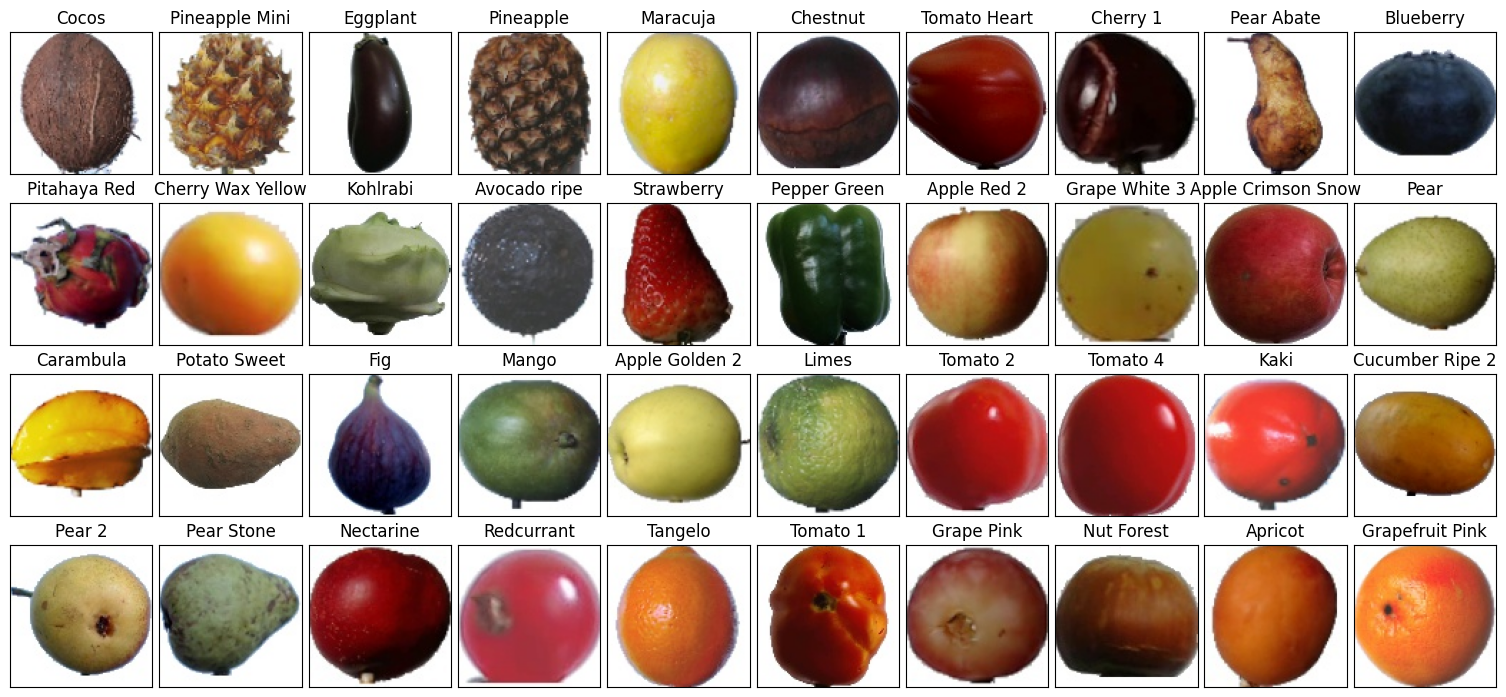

In [8]:
# Create a DataFrame with one Label of each category
df_unique = train_df.copy().drop_duplicates(subset=["Label"]).reset_index()

# Display some pictures of the dataset
fig, axes = plt.subplots(nrows=4, ncols=10, figsize=(15, 7),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(df_unique.Filepath[i]))
    ax.set_title(df_unique.Label[i], fontsize = 12)
plt.tight_layout(pad=0.5)
plt.show()

In [9]:
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input,
    validation_split=0.2
)

test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

train_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=0,
    subset='training',
    rotation_range=30,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)

val_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=0,
    subset='validation',
    rotation_range=30,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)

test_images = test_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)

Found 54154 validated image filenames belonging to 131 classes.
Found 13538 validated image filenames belonging to 131 classes.
Found 22688 validated image filenames belonging to 131 classes.


In [11]:
# Load the pretained model
pretrained_model = tf.keras.applications.MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)

pretrained_model.trainable = False

In [12]:
inputs = pretrained_model.input

x = tf.keras.layers.Dense(128, activation='relu')(pretrained_model.output)
x = tf.keras.layers.Dense(128, activation='relu')(x)

outputs = tf.keras.layers.Dense(131, activation='softmax')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_images,
    validation_data=val_images,
    epochs=1
)

1693/1693 [==============================] - 2962s 2s/step - loss: 0.2824 - accuracy: 0.9395 - val_loss: 0.0270 - val_accuracy: 0.9925


In [13]:
# Predict the label of the test_images
pred = model.predict(test_images)
pred = np.argmax(pred,axis=1)

# Map the label
labels = (train_images.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in pred]

# Display the result
print(f'The first 5 predictions: {pred[:5]}')

709/709 [==============================] - 914s 1s/step
The first 5 predictions: ['Dates', 'Cherry Wax Yellow', 'Peach 2', 'Tomato 1', 'Apple Granny Smith']


In [14]:
from sklearn.metrics import accuracy_score
y_test = list(test_df.Label)
acc = accuracy_score(y_test,pred)
print(f'Accuracy on the test set: {acc * 100:.2f}%')

Accuracy on the test set: 94.59%


In [ ]:
from sklearn.metrics import classification_report
class_report = classification_report(y_test, pred, zero_division=1)
print(class_report)

In [ ]:
# Display 50 picture of the dataset with their labels
fig, axes = plt.subplots(nrows=5, ncols=7, figsize=(20, 12),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(test_df.Filepath.iloc[i]))
    ax.set_title(f"True: {test_df.Label.iloc[i].split('_')[0]}\nPredicted: {pred[i].split('_')[0]}", fontsize = 15)
plt.tight_layout()
plt.show()

In [ ]:
from keras.models import load_model

# Substitua 'fruits-classifier.h5' pelo nome do arquivo em que deseja salvar o modelo.
model.save('/content/fruits-classifier.h5')

In [ ]:
# Plot training curves
plt.figure(figsize=(12, 6))

# Plot training accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot training loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
